In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas_datareader as data
import yfinance as yf



In [4]:

start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL',start=start,end=end)
print(df.head())

[*********************100%***********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.454505  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.465666  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.362820  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.351058  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.393281  447610800


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,68.908981,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,68.974503,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.342987,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.316277,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,70.733612,144114400


In [6]:
df.reset_index()
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465666,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362820,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351058,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800


In [7]:
if 'Date' not in df.columns and df.index.name == 'Date':
    df = df.reset_index()

# Correctly dropping both 'Date' and 'Adj Close'
df = df.drop(['Date', 'Adj Close'], axis=1, errors='ignore')

# Print to check the results
print(df.head())

       Open      High       Low     Close     Volume
0  7.622500  7.660714  7.585000  7.643214  493729600
1  7.664286  7.699643  7.616071  7.656429  601904800
2  7.656429  7.686786  7.526786  7.534643  552160000
3  7.562500  7.571429  7.466071  7.520714  477131200
4  7.510714  7.571429  7.466429  7.570714  447610800


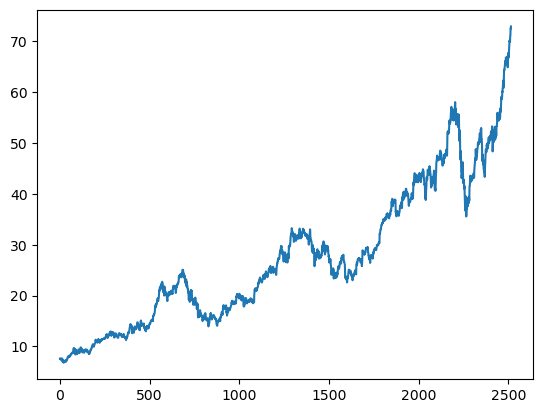

In [8]:
plt.plot(df.Close)

In [9]:
df


,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

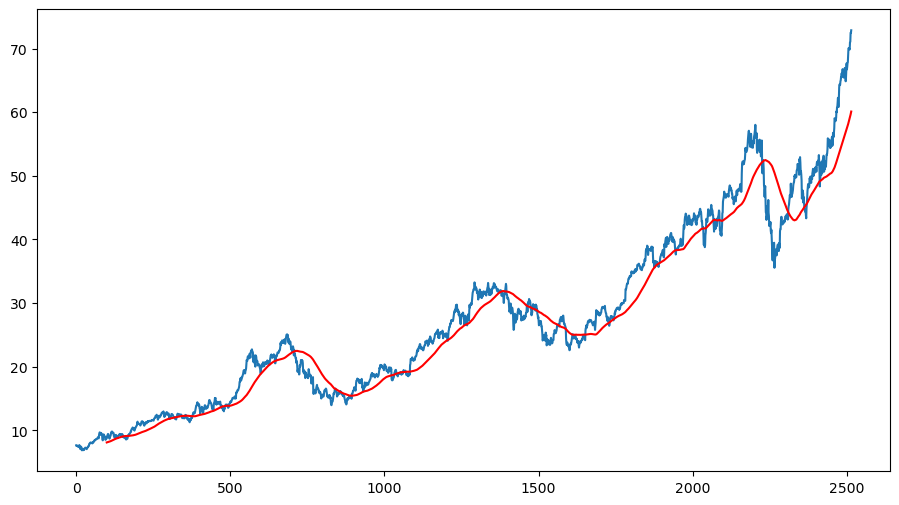

In [11]:
plt.figure(figsize =(11,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

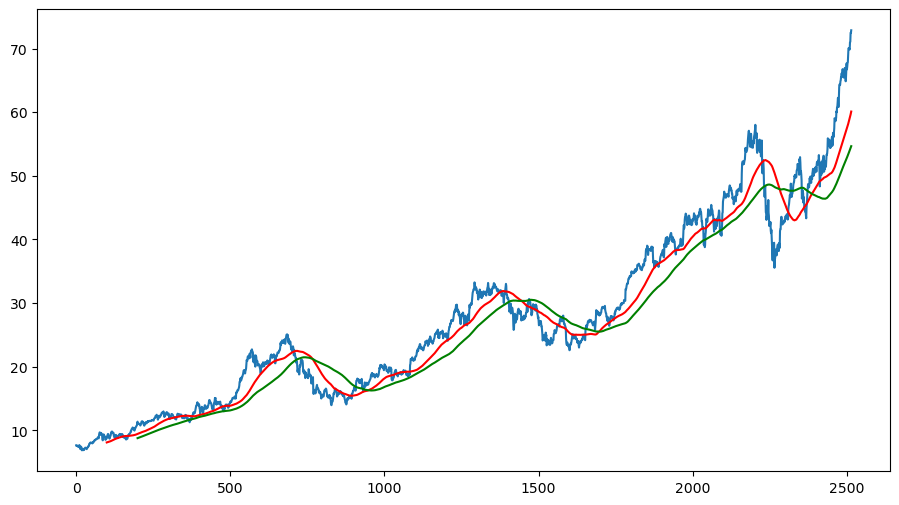

In [13]:
plt.figure(figsize =(11,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200,'g')

In [14]:
df.shape

(2515, 5)

In [15]:
# Assuming the correct name is 'Close'
data_training = pd.DataFrame(df['Close'][0:int(len(df) * 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70):int(len(df))])

# Print the shapes of the training and testing sets
print("Training data shape:", data_training.shape)
print("Testing data shape:", data_testing.shape)


Training data shape: (1760, 1)
Testing data shape: (755, 1)


In [16]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [17]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [20]:
x_train =[]
y_train = []   

for i in range(100,data_training_array.shape[0]):
     x_train.append(data_training_array[i-100: i])
     y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train), np.array(y_train)

In [21]:
x_train.shape

(1660, 100, 1)

In [22]:
from sklearn.model_selection import train_test_split
import numpy as np

# Example initialization
X = np.random.rand(100, 10)  # Replace with your actual data
y = np.random.rand(100)      # Replace with your actual data

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, x_test and y_test are defined, so this will work
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)


(20, 10)
(20,)


In [23]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(units = 50, activation ='relu',return_sequences =True,input_shape =(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation ='relu',return_sequences =True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation ='relu',return_sequences =True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation ='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 60)         │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 10, 80)         │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 80)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train,y_train, epochs =50)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.3278
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2569 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2035 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1405 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0920 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1214 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0987 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0923 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0943
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0947 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0879 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0873 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0974 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0870 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1049
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━

In [53]:
model.save('keras_model.keras')

In [28]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [29]:
past_100_days = data_training.tail(100)

In [32]:
import pandas as pd

# Assuming past_100_days and data_testing are DataFrames
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [33]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [35]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [36]:
input_data.shape

(855, 1)

In [40]:
# Initialize x_test and y_test as lists
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])  # Assuming you meant input_data here, not input

# Convert the lists to numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)


In [41]:
x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [42]:
#making preedictions
y_predicted = model.predict(x_test)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


In [43]:
y_predicted.shape

(755, 1)

In [44]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [45]:
y_predicted

array([[1.1001775],
       [1.1006749],
       [1.101211 ],
       [1.1017764],
       [1.1023613],
       [1.1029582],
       [1.1035634],
       [1.1041785],
       [1.1048058],
       [1.1054494],
       [1.1061112],
       [1.1067915],
       [1.1074904],
       [1.1082091],
       [1.1089457],
       [1.1096984],
       [1.1104647],
       [1.1112419],
       [1.1120309],
       [1.1128345],
       [1.1136552],
       [1.114494 ],
       [1.1153479],
       [1.1162363],
       [1.1171814],
       [1.1182044],
       [1.119325 ],
       [1.1205624],
       [1.12193  ],
       [1.1234413],
       [1.1250967],
       [1.126894 ],
       [1.1288309],
       [1.1309048],
       [1.1331111],
       [1.1354386],
       [1.137877 ],
       [1.140415 ],
       [1.1430405],
       [1.1457354],
       [1.1484836],
       [1.1512678],
       [1.15408  ],
       [1.1569124],
       [1.1597592],
       [1.1626116],
       [1.1654629],
       [1.1683019],
       [1.171117 ],
       [1.1738958],


In [46]:
scaler.scale_

array([0.02123255])

In [47]:
scale_factor =1/0.02123255
y_predicted = y_predicted* scale_factor
y_test = y_test * scale_factor

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
First 10 actual prices (y_test): [3.40000159 3.17250067 3.25500113 3.22249991 3.37000091 3.69500168
 3.96500023 3.99500092 4.15500077 4.03000077]
First 10 predicted prices (Y_predicted): [[1.1001775]
 [1.1006749]
 [1.101211 ]
 [1.1017764]
 [1.1023613]
 [1.1029582]
 [1.1035634]
 [1.1041785]
 [1.1048058]
 [1.1054494]]
Shape of y_test: (755,)
Shape of Y_predicted: (755, 1)


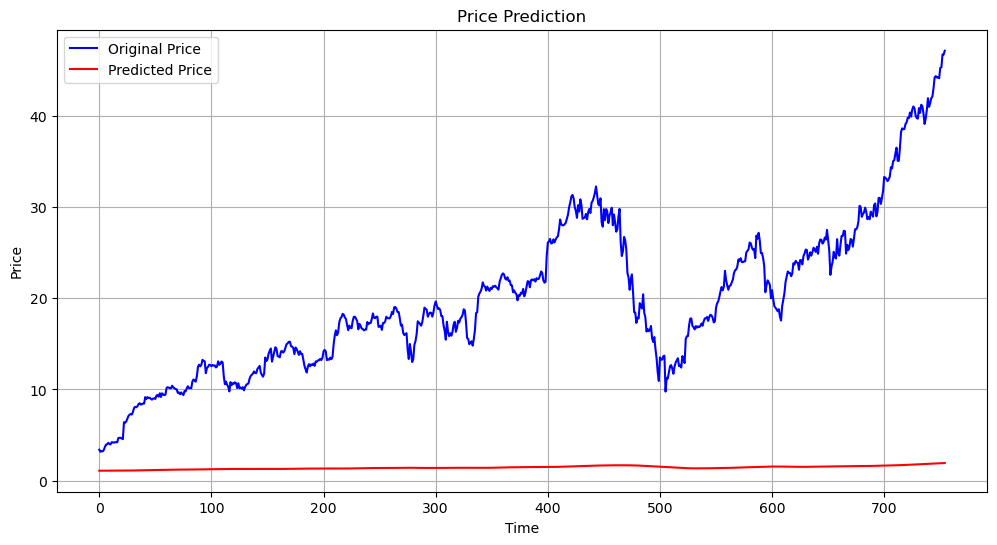

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and x_test are already defined, and model is trained
Y_predicted = model.predict(x_test)  # Predict using the model

# Print the first few values for debugging
print("First 10 actual prices (y_test):", y_test[:10])
print("First 10 predicted prices (Y_predicted):", Y_predicted[:10])

# Check shapes to ensure they match
print("Shape of y_test:", y_test.shape)
print("Shape of Y_predicted:", Y_predicted.shape)

# Plotting the original and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')  # Original prices in blue
plt.plot(Y_predicted, 'r', label='Predicted Price')  # Predicted prices in red
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Price Prediction')
plt.legend()
plt.grid()
plt.show()
